# Energy Consumption Prediction Project
### Models: Linear Regression, Random Forest, XGBoost, LSTM, GRU

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

2025-06-16 20:41:08.854519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load and preprocess data
df = pd.read_csv('data/energydata_complete.csv', parse_dates=['date'], index_col='date')
df = df.drop(['rv1', 'rv2'], axis=1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
X, y = [], []
sequence_length = 24
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length][0])
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Reshape for ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [4]:
# Train ML models
lr = LinearRegression().fit(X_train_flat, y_train)
rf = RandomForestRegressor().fit(X_train_flat, y_train)
xgb = XGBRegressor().fit(X_train_flat, y_train)
ml_models = {
    'Linear Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb
}

In [5]:
# Train deep learning models
lstm_model = Sequential([LSTM(50, return_sequences=False, input_shape=(24, X.shape[2])), Dense(1)])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, verbose=0)

gru_model = Sequential([GRU(50, return_sequences=False, input_shape=(24, X.shape[2])), Dense(1)])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=5, verbose=0)

/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Evaluate models
results = {}
for name, model in ml_models.items():
    y_pred = model.predict(X_test_flat)
    results[name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }

lstm_pred = lstm_model.predict(X_test).flatten()
gru_pred = gru_model.predict(X_test).flatten()
results['LSTM'] = {
    'RMSE': mean_squared_error(y_test, lstm_pred, squared=False),
    'R2': r2_score(y_test, lstm_pred)
}
results['GRU'] = {
    'RMSE': mean_squared_error(y_test, gru_pred, squared=False),
    'R2': r2_score(y_test, gru_pred)
}

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


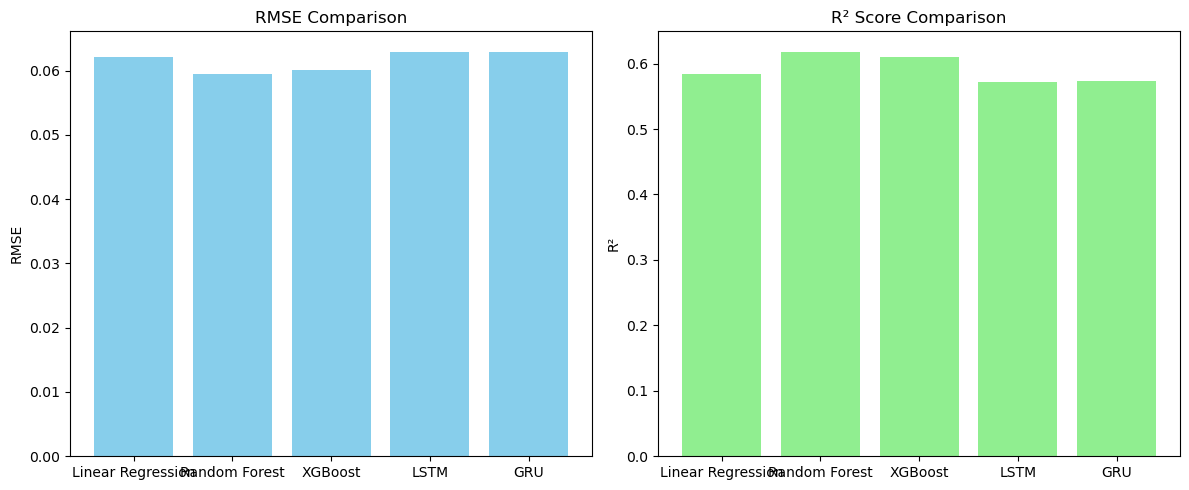

In [7]:
# Plot RMSE and R²
rmse_vals = [v['RMSE'] for v in results.values()]
r2_vals = [v['R2'] for v in results.values()]
model_names = list(results.keys())

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(model_names, rmse_vals, color='skyblue')
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE')
axs[1].bar(model_names, r2_vals, color='lightgreen')
axs[1].set_title('R² Score Comparison')
axs[1].set_ylabel('R²')
plt.tight_layout()
plt.show()

In [8]:
# Print evaluation metrics for each model
print("Model Evaluation Results:\n")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  - RMSE: {metrics['RMSE']:.4f}")
    print(f"  - R² Score: {metrics['R2']:.4f}")
    print()


Model Evaluation Results:

Linear Regression:
  - RMSE: 0.0621
  - R² Score: 0.5839

Random Forest:
  - RMSE: 0.0595
  - R² Score: 0.6183

XGBoost:
  - RMSE: 0.0602
  - R² Score: 0.6094

LSTM:
  - RMSE: 0.0630
  - R² Score: 0.5721

GRU:
  - RMSE: 0.0629
  - R² Score: 0.5734



In [9]:
#retraining all models with weather data

In [10]:
# Flatten for 2D models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [11]:
#train lr
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_flat, y_train)


LinearRegression()

In [12]:
#train rf
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)


RandomForestRegressor(random_state=42)

In [13]:
#train xgb
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_flat, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
#train lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model with updated input shape
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile and train
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0260 - val_loss: 0.0053
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0040 - val_loss: 0.0039


In [15]:
#train gru
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

gru_model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0140 - val_loss: 0.0041
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0041 - val_loss: 0.0053
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0039 - val_loss: 0.0041


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"🔍 {name}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.2f}\n")

# Predict and Evaluate
evaluate_model("Linear Regression", y_test, lr_model.predict(X_test_flat))
evaluate_model("Random Forest", y_test, rf_model.predict(X_test_flat))
evaluate_model("XGBoost", y_test, xgb_model.predict(X_test_flat))
evaluate_model("GRU", y_test, gru_model.predict(X_test).flatten())
evaluate_model("LSTM", y_test, lstm_model.predict(X_test).flatten())


🔍 Linear Regression
  MSE: 0.00
  RMSE: 0.06
  R²: 0.58

🔍 Random Forest
  MSE: 0.00
  RMSE: 0.06
  R²: 0.62

🔍 XGBoost
  MSE: 0.00
  RMSE: 0.06
  R²: 0.63

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
🔍 GRU
  MSE: 0.00
  RMSE: 0.06
  R²: 0.56

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
🔍 LSTM
  MSE: 0.00
  RMSE: 0.06
  R²: 0.58



In [17]:
import joblib

joblib.dump(lr_model, "lr_with_weather.pkl")
joblib.dump(rf_model, "rf_with_weather.pkl")
joblib.dump(xgb_model, "xgboost_energy_model.pkl")
joblib.dump(scaler, "scaler_with_weather.pkl")  # if not saved already

gru_model.save("gru_with_weather.keras")
lstm_model.save("lstm_with_weather.keras")


In [18]:
# Recreate and store ML models in a dictionary
models = {
    "Linear Regression": lr_model,  # trained Linear Regression model
    "Random Forest": rf_model,      # trained Random Forest model
    "XGBoost": xgb_model            # trained XGBoost model
}


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Dictionary to store results
results = {}

# Evaluate ML models (Linear, RF, XGB)
for name, model in models.items():
    y_pred = model.predict(X_test_flat)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

# Evaluate LSTM
y_pred_lstm = lstm_model.predict(X_test)
rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
r2_lstm = r2_score(y_test, y_pred_lstm)
results["LSTM"] = {"RMSE": rmse_lstm, "R2": r2_lstm}

# Evaluate GRU
y_pred_gru = gru_model.predict(X_test)
rmse_gru = mean_squared_error(y_test, y_pred_gru, squared=False)
r2_gru = r2_score(y_test, y_pred_gru)
results["GRU"] = {"RMSE": rmse_gru, "R2": r2_gru}


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


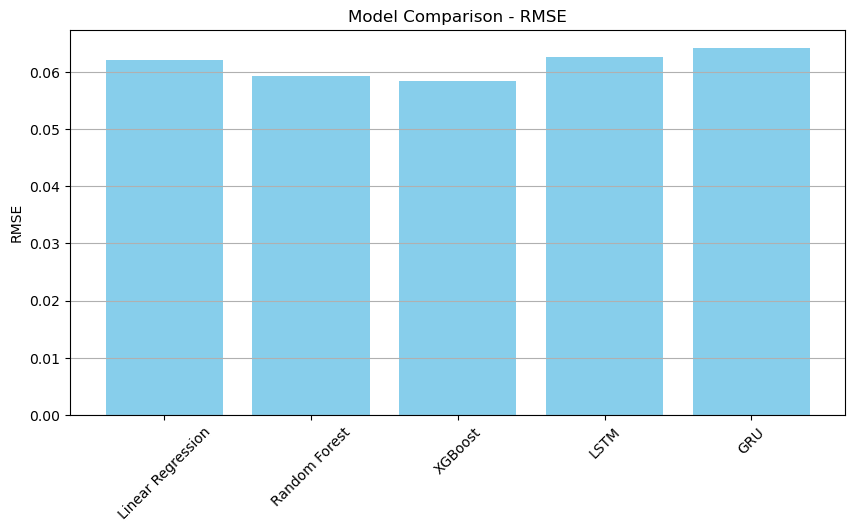

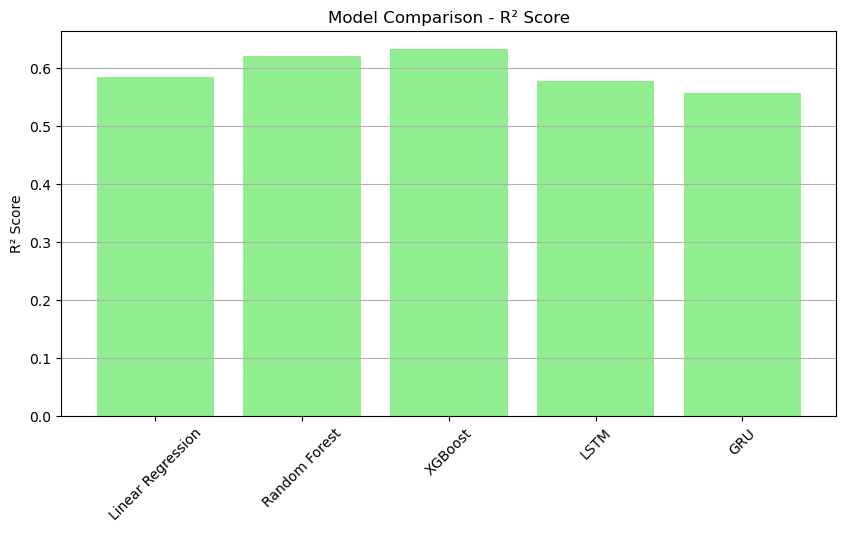

In [20]:
# Plotting RMSE
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), [v["RMSE"] for v in results.values()], color='skyblue')
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plotting R² Score
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), [v["R2"] for v in results.values()], color='lightgreen')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [21]:
import joblib

# Replace `xgb_model` with the variable name you used for your XGBoost model
joblib.dump(xgb_model, "xgboost_energy_model.pkl")


['xgboost_energy_model.pkl']

In [22]:
import os
os.getcwd()


'/Users/apple/Desktop/energy-consumption-prediction'

In [23]:
import joblib

# Save directly to the correct project path
joblib.dump(xgb_model, "/Users/apple/energy-consumption-prediction/xgboost_energy_model.pkl")


['/Users/apple/energy-consumption-prediction/xgboost_energy_model.pkl']

In [25]:
import pandas as pd
from xgboost import XGBRegressor
import joblib

# Load your dataset (update path if needed)
data = pd.read_csv("data/energydata_complete.csv")  # Or wherever your CSV is

# Use the same features your Streamlit app expects
features = ['T1', 'RH_1', 'T2', 'RH_2', 'T_out', 'RH_out', 'Visibility', 'Windspeed', 'Tdewpoint']
X = data[features]
y = data['Appliances']  # Replace if your target is different

# Train the model
xgb_model = XGBRegressor()
xgb_model.fit(X, y)

# Save the model
joblib.dump(xgb_model, "xgboost_energy_model.pkl")


['xgboost_energy_model.pkl']